In [64]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from math import pi

In [65]:
complete = pd.read_csv("data/nyra_2019_complete.csv")
race = pd.read_csv("data/nyra_race_table.csv")
start = pd.read_csv("data/nyra_start_table.csv")
tracking = pd.read_csv("data/nyra_tracking_table.csv")

/var/folders/pk/zmnwmmlj6d16wn3l4ql40ym80000gn/T/ipykernel_39571/3381052905.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  complete = pd.read_csv("data/nyra_2019_complete.csv")


In [66]:
complete.head()

,AQU,2019-01-01,9,6,72,40.6729017197787,-73.8276065972899,600,D,GD,48,CLM,25000.00,00420,120,Andre Shivnarine Worrie,2090,8
0,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,65,40.672596,-73.827742,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8


In [67]:
race.head()

,track_id,race_date,race_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time
0,AQU,2019-01-01,1,650,D,MY,36,AOC,80000,1220
1,AQU,2019-01-01,2,600,D,MY,48,MCL,41000,1250
2,AQU,2019-01-01,3,550,D,MY,54,MCL,35000,121
3,AQU,2019-01-01,4,900,D,MY,101,AOC,80000,150
4,AQU,2019-01-01,5,700,D,MY,60,ALW,64000,220


In [68]:
start.columns = ["track_id", "race_date", "race_number", "program_number", "weight_carried", "jockey", "odd", "position_at_finish"]
start.head()


,track_id,race_date,race_number,program_number,weight_carried,jockey,odd,position_at_finish
0,AQU,2019-01-01,1,2,120,Junior Alvarado,295,3
1,AQU,2019-01-01,1,3,118,Jose Lezcano,180,4
2,AQU,2019-01-01,1,4,123,Jomar Garcia,1280,5
3,AQU,2019-01-01,1,5,118,Manuel Franco,1150,1
4,AQU,2019-01-01,2,1,121,Jose Lezcano,220,2


In [69]:
tracking.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762


In [70]:
rate_jockey = pd.merge(start, race, on=["track_id","race_date", "race_number" ], how="left")
rate_jockey = rate_jockey.loc[:,["jockey", "track_id", "distance_id", "course_type", "position_at_finish"]]
rate_jockey = rate_jockey.sort_values("jockey")
rate_jockey

,jockey,track_id,distance_id,course_type,position_at_finish
863,Abner Adorno,AQU,600,D,7
9952,Abner Adorno,BEL,800,T,8
14560,Abner Adorno,SAR,850,T,6
6574,Adam Beschizza,BEL,650,D,4
6466,Adam Beschizza,BEL,850,D,4
...,...,...,...,...,...
13315,Wilmer A. Garcia,SAR,550,T,8
5459,Wilmer A. Garcia,AQU,650,D,3
11317,Wilmer A. Garcia,BEL,600,D,9
9907,Wilmer A. Garcia,BEL,700,D,8


The amount of top 3 metals is what we are interested of looking at which we want to create a chart for total amount of metals received for the best 10 jockeys.

In [71]:
rate_jockey["First"] = np.where( (rate_jockey.position_at_finish == 1), 1, 0)
rate_jockey["Second"] = np.where( (rate_jockey.position_at_finish == 2), 1, 0)
rate_jockey["Third"] = np.where( (rate_jockey.position_at_finish == 3), 1, 0)

jockey_by_metal = rate_jockey.groupby(["jockey"])[["First", "Second", "Third"]].sum()
jockey_by_metal = jockey_by_metal.sort_values(["First", "Second", "Third"], ascending = False)
jockey_by_metal.head(10)


,First,Second,Third
jockey,,,
Manuel Franco,214,214,192
Jose Lezcano,206,156,129
Junior Alvarado,161,115,124
Irad Ortiz Jr.,151,161,121
Jose L. Ortiz,136,127,101
Dylan Davis,133,149,153
Joel Rosario,121,107,118
Javier Castellano,113,100,83
Luis Saez,110,92,79


1st place is what we care the most which now we want to analyze all jockey rating based on their first place only. First we want to consider top 10 jockeys who joined at least 10 games which has the highest winrate. 

In [72]:
rate_jockey["games"] = 1
winrate_jockey = rate_jockey.groupby(["jockey"])[["First", "Second", "Third", "games"]].sum()
winrate_jockey["win_rate"] = winrate_jockey["First"] / winrate_jockey["games"]
winrate_jockey["win/loss_ratio"] = (winrate_jockey["First"] + winrate_jockey["Second"]+ winrate_jockey["Third"] )/ (winrate_jockey["games"] - winrate_jockey["First"] - winrate_jockey["Second"] - winrate_jockey["Third"])

winrate_10g_jockey = winrate_jockey[winrate_jockey["games"] >= 10]
winrate_10g_jockey = winrate_10g_jockey.sort_values(["win_rate"], ascending = False)
winrate_10g_jockey.head(10)

,First,Second,Third,games,win_rate,win/loss_ratio
jockey,,,,,,
David Cohen,3,0,2,11,0.272727,0.833333
Mike E. Smith,3,1,1,13,0.230769,0.625000
Javier Castellano,113,100,83,541,0.208872,1.208163
Jose Lezcano,206,156,129,990,0.208081,0.983968
Jose L. Ortiz,136,127,101,702,0.193732,1.076923
Junior Alvarado,161,115,124,852,0.188967,0.884956
Irad Ortiz Jr.,151,161,121,802,0.188279,1.173442
Flavien Prat,3,0,5,16,0.187500,1.000000
Joel Rosario,121,107,118,657,0.184170,1.112540


Win_rate is calculated based on the number of first place divided by the number of games each jockey has played for. The win loss ratio is calculated by the number of times in top 3 divided by the games that are not in top 3. Win rate gives us a clear view on which jockey is most welling to win the game and win loss ratio is used to see the ratio of top 3 rate over a given period. If the value of the ratio is above 1 then we have higher than 50% of the chance to see this jockey make it into the top 3 positions. This chart shows Javier Castellano is very consistent of getting a high rank in each race since the win/loss ratio is the highest and he is in the third place for the win rate.

In [73]:
AQU = rate_jockey.loc[rate_jockey["track_id"] == "AQU"]
BEL = rate_jockey.loc[rate_jockey["track_id"] == "BEL"]
SAR = rate_jockey.loc[rate_jockey["track_id"] == "SAR"]

In [74]:
AQU10_jockey = AQU.groupby(["jockey"])[["First","Second","Third","games"]].sum()
AQU10_jockey["win_rate"] = AQU10_jockey["First"] / AQU10_jockey["games"]
AQU10_jockey["win/loss_ratio"] = (AQU10_jockey["First"] + AQU10_jockey["Second"]+ AQU10_jockey["Third"] )/ (AQU10_jockey["games"] - AQU10_jockey["First"] - AQU10_jockey["Second"] - AQU10_jockey["Third"])
AQU10_jockey = AQU10_jockey[AQU10_jockey["games"] >= 10 ]
AQU10_jockey["AQU_Rank"] = AQU10_jockey["win/loss_ratio"].rank(ascending = False)
AQU10_jockey = AQU10_jockey.sort_values(["win/loss_ratio"], ascending = False)

AQU10_jockey.head(10)


,First,Second,Third,games,win_rate,win/loss_ratio,AQU_Rank
jockey,,,,,,,
Irad Ortiz Jr.,38,38,22,170,0.223529,1.361111,1.0
Manuel Franco,127,110,89,572,0.222028,1.325203,2.0
Jose Lezcano,103,70,58,440,0.234091,1.105263,3.0
Javier Castellano,22,15,14,100,0.220000,1.040816,4.0
Junior Alvarado,86,53,69,413,0.208232,1.014634,5.0
Eric Cancel,65,53,69,400,0.162500,0.877934,6.0
Joel Rosario,17,25,11,114,0.149123,0.868852,7.0
Luis Saez,5,5,8,40,0.125000,0.818182,8.0
Rajiv Maragh,26,35,36,221,0.117647,0.782258,9.0


This table shows the top 10 jockey played in Aqueduct(AQU) who has the highest 10 win/loss ratio. The reason why we sort by the ratio instead of the win rate is because the difference between top 10 win rate isn't much. However, getting into top 3 that affects the win/loss ratio seems to have a larger difference between first place and tenth place. This is a much better variable for us to consider the average performance of each jockey.

In [75]:
BEL10_jockey = BEL.groupby(["jockey"])[["First","Second","Third","games"]].sum()
BEL10_jockey["win_rate"] = BEL10_jockey["First"] / BEL10_jockey["games"]
BEL10_jockey["win/loss_ratio"] = (BEL10_jockey["First"] + BEL10_jockey["Second"]+ BEL10_jockey["Third"] )/ (BEL10_jockey["games"] - BEL10_jockey["First"] - BEL10_jockey["Second"] - BEL10_jockey["Third"])
BEL10_jockey = BEL10_jockey[BEL10_jockey["games"] >= 10 ]
BEL10_jockey["BEL_Rank"] = BEL10_jockey["win/loss_ratio"].rank(ascending = False)
BEL10_jockey = BEL10_jockey.sort_values(["win/loss_ratio"], ascending = False)

BEL10_jockey.head(10)


,First,Second,Third,games,win_rate,win/loss_ratio,BEL_Rank
jockey,,,,,,,
Joel Rosario,67,49,69,322,0.208075,1.350365,1.0
Jose L. Ortiz,62,62,49,307,0.201954,1.291045,2.0
Javier Castellano,52,56,40,266,0.195489,1.254237,3.0
Irad Ortiz Jr.,60,69,61,360,0.166667,1.117647,4.0
Jose Lezcano,81,69,51,384,0.210938,1.098361,5.0
Flavien Prat,3,0,4,14,0.214286,1.000000,6.0
John R. Velazquez,39,31,30,206,0.189320,0.943396,7.0
Junior Alvarado,52,43,40,286,0.181818,0.894040,8.0
Manuel Franco,70,75,74,467,0.149893,0.883065,9.0


This table shows the top 10 jockey played in Belmont(BEL) who has the highest 10 win/loss ratio.

In [76]:
SAR10_jockey = SAR.groupby(["jockey"])[["First","Second","Third","games"]].sum()
SAR10_jockey["win_rate"] = SAR10_jockey["First"] / SAR10_jockey["games"]
SAR10_jockey["win/loss_ratio"] = (SAR10_jockey["First"] + SAR10_jockey["Second"]+ SAR10_jockey["Third"] )/ (SAR10_jockey["games"] - SAR10_jockey["First"] - SAR10_jockey["Second"] - SAR10_jockey["Third"])
SAR10_jockey = SAR10_jockey[SAR10_jockey["games"] >= 10 ]
SAR10_jockey["SAR_Rank"] = SAR10_jockey["win/loss_ratio"].rank(ascending = False)
SAR10_jockey = SAR10_jockey.sort_values(["win/loss_ratio"], ascending = False)

SAR10_jockey.head(10)



,First,Second,Third,games,win_rate,win/loss_ratio,SAR_Rank
jockey,,,,,,,
Javier Castellano,39,29,29,175,0.222857,1.243590,1.0
Irad Ortiz Jr.,53,54,38,272,0.194853,1.141732,2.0
Jose L. Ortiz,60,45,38,280,0.214286,1.043796,3.0
Joel Rosario,37,33,38,221,0.167421,0.955752,4.0
John R. Velazquez,21,23,14,130,0.161538,0.805556,5.0
Luis Saez,36,41,32,272,0.132353,0.668712,6.0
Junior Alvarado,23,19,15,153,0.150327,0.593750,7.0
Jose Lezcano,22,17,20,166,0.132530,0.551402,8.0
Ricardo Santana Jr.,18,19,19,163,0.110429,0.523364,9.0


This table shows the top 10 jockey played in Saratoga(SAR) who has the highest 10 win/loss ratio.

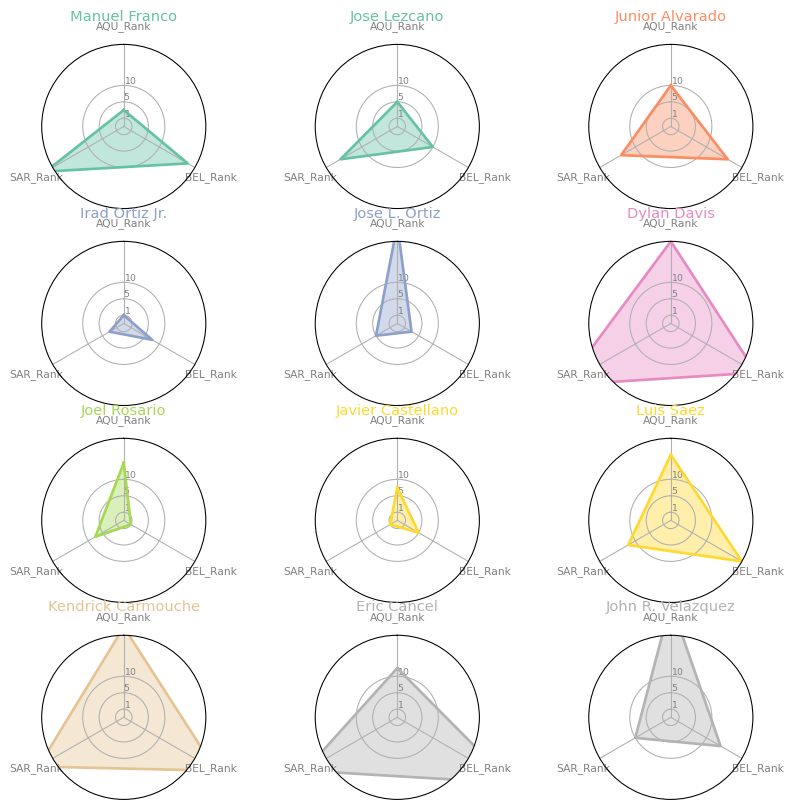

In [140]:
#Create a table for radar chart

radar_jockey1 = pd.merge(jockey_by_metal, AQU10_jockey,  on=["jockey"], how="left")
radar_jockey1 = radar_jockey1.loc[:,["AQU_Rank"]]
radar_jockey2 = pd.merge(radar_jockey1, BEL10_jockey,  on=["jockey"], how="left")
radar_jockey2 = radar_jockey2.loc[:,["AQU_Rank", "BEL_Rank"]]
radar_jockey3 = pd.merge(radar_jockey2, SAR10_jockey,  on=["jockey"], how="left")
radar_jockey3 = radar_jockey3.loc[:,["AQU_Rank", "BEL_Rank", "SAR_Rank"]]

radar_jockey = radar_jockey3.head(12)
radar_jockey = radar_jockey.reset_index()


# ------- PART 1: Define a function that do a plot for one line of the dataset!

def make_spider( row, title, color):

    # number of variable
    categories=list(radar_jockey)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(4,3,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,3,5], ["1","5","10"], color="grey", size=7)
    plt.ylim(0,10)

    # Ind1
    values=radar_jockey.loc[row].drop('jockey').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar_jockey.index))
 
# Loop to plot
for row in range(0, len(radar_jockey.index)):
    make_spider( row=row, title= radar_jockey['jockey'][row], color=my_palette(row))

These radar charts show the performance of the top 12 most metals received jockeys in different tracks. Smaller triangle means higher win/loss ratio ranking in different tracks. If we look at Manuel Franco, we can clearly see that he performs better in Aqueduct(AQU) than the other two tracks. Jose L. Ortiz on the other hand, performs much better in Belmont(BEL) and Saratoga(SAR) than in Aqueduct(AQU). By using this chart, we can clearly see the advantage and disadvantage for each jockey in different tracks.

